## Regression Analysis & Preditction for Business Success Metrics

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
tqdm.pandas()

In [2]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  

In [3]:
desired_budget = 100000000
desired_genres = ['Action', 'Adventure']
desired_revenue = 350000000
desired_imdb_popularity = 100

In [4]:
df = pd.DataFrame(pd.read_csv('../data/imdb_tmdb_regression.csv'))
df.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,production_companies,production_countries,keywords,overview_sentiment,actor_list,director,genre
0,27205,Inception,8.364,34495,2010-07-15,825532764,148,160000000,en,83.952,"['Legendary Pictures', 'Syncopy', 'Warner Bros...","['United Kingdom', 'United States of America']","['rescue', 'mission', 'dream', 'airplane', 'pa...",-0.011111,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",['Christopher Nolan'],"['Action', 'Science Fiction', 'Adventure']"
1,157336,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,en,140.241,"['Legendary Pictures', 'Syncopy', 'Lynda Obst ...","['United Kingdom', 'United States of America']","['rescue', 'future', 'spacecraft', 'race again...",0.045455,"['Matthew McConaughey', 'Anne Hathaway', 'Jess...",['Christopher Nolan'],"['Adventure', 'Drama', 'Science Fiction']"
2,155,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,185000000,en,130.643,"['DC Comics', 'Legendary Pictures', 'Syncopy',...","['United Kingdom', 'United States of America']","['joker', 'sadism', 'chaos', 'secret identity'...",0.025000,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",['Christopher Nolan'],"['Drama', 'Action', 'Crime', 'Thriller']"
3,19995,Avatar,7.573,29815,2009-12-15,2923706026,162,237000000,en,79.932,"['Dune Entertainment', 'Lightstorm Entertainme...","['United States of America', 'United Kingdom']","['future', 'society', 'culture clash', 'space ...",0.041667,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",['James Cameron'],"['Action', 'Adventure', 'Fantasy', 'Science Fi..."
4,24428,The Avengers,7.710,29166,2012-04-25,1518815515,143,220000000,en,98.082,['Marvel Studios'],['United States of America'],"['new york city', 'superhero', 'shield', 'base...",0.025000,"['Robert Downey Jr.', 'Chris Evans', 'Scarlett...",['Joss Whedon'],"['Science Fiction', 'Action', 'Adventure']"


In [5]:
df['production_companies'] = df['production_companies'].progress_apply(lambda x: ast.literal_eval(x))
df['production_countries'] = df['production_countries'].progress_apply(lambda x: ast.literal_eval(x))
df['keywords'] = df['keywords'].progress_apply(lambda x: ast.literal_eval(x))
df['actor_list'] = df['actor_list'].progress_apply(lambda x: ast.literal_eval(x))
df['director'] = df['director'].progress_apply(lambda x: ast.literal_eval(x))
df['genre'] = df['genre'].progress_apply(lambda x: ast.literal_eval(x))
df.head()

  0%|          | 0/454347 [00:00<?, ?it/s]

  0%|          | 0/454347 [00:00<?, ?it/s]

  0%|          | 0/454347 [00:00<?, ?it/s]

  0%|          | 0/454347 [00:00<?, ?it/s]

  0%|          | 0/454347 [00:00<?, ?it/s]

  0%|          | 0/454347 [00:00<?, ?it/s]

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,production_companies,production_countries,keywords,overview_sentiment,actor_list,director,genre
0,27205,Inception,8.364,34495,2010-07-15,825532764,148,160000000,en,83.952,"[Legendary Pictures, Syncopy, Warner Bros. Pic...","[United Kingdom, United States of America]","[rescue, mission, dream, airplane, paris, fran...",-0.011111,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",[Christopher Nolan],"[Action, Science Fiction, Adventure]"
1,157336,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,en,140.241,"[Legendary Pictures, Syncopy, Lynda Obst Produ...","[United Kingdom, United States of America]","[rescue, future, spacecraft, race against time...",0.045455,"[Matthew McConaughey, Anne Hathaway, Jessica C...",[Christopher Nolan],"[Adventure, Drama, Science Fiction]"
2,155,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,185000000,en,130.643,"[DC Comics, Legendary Pictures, Syncopy, Isobe...","[United Kingdom, United States of America]","[joker, sadism, chaos, secret identity, crime ...",0.025000,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",[Christopher Nolan],"[Drama, Action, Crime, Thriller]"
3,19995,Avatar,7.573,29815,2009-12-15,2923706026,162,237000000,en,79.932,"[Dune Entertainment, Lightstorm Entertainment,...","[United States of America, United Kingdom]","[future, society, culture clash, space travel,...",0.041667,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[Action, Adventure, Fantasy, Science Fiction]"
4,24428,The Avengers,7.710,29166,2012-04-25,1518815515,143,220000000,en,98.082,[Marvel Studios],[United States of America],"[new york city, superhero, shield, based on co...",0.025000,"[Robert Downey Jr., Chris Evans, Scarlett Joha...",[Joss Whedon],"[Science Fiction, Action, Adventure]"


In [6]:
df['month'] = df['release_date'].progress_apply(lambda x: x.split('-')[1])
df['day'] = df['release_date'].progress_apply(lambda x: x.split('-')[2])
df.drop(columns=['release_date'], inplace=True)
df.head()

  0%|          | 0/454347 [00:00<?, ?it/s]

  0%|          | 0/454347 [00:00<?, ?it/s]

,id,title,vote_average,vote_count,revenue,runtime,budget,original_language,popularity,production_companies,production_countries,keywords,overview_sentiment,actor_list,director,genre,month,day
0,27205,Inception,8.364,34495,825532764,148,160000000,en,83.952,"[Legendary Pictures, Syncopy, Warner Bros. Pic...","[United Kingdom, United States of America]","[rescue, mission, dream, airplane, paris, fran...",-0.011111,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",[Christopher Nolan],"[Action, Science Fiction, Adventure]",07,15
1,157336,Interstellar,8.417,32571,701729206,169,165000000,en,140.241,"[Legendary Pictures, Syncopy, Lynda Obst Produ...","[United Kingdom, United States of America]","[rescue, future, spacecraft, race against time...",0.045455,"[Matthew McConaughey, Anne Hathaway, Jessica C...",[Christopher Nolan],"[Adventure, Drama, Science Fiction]",11,05
2,155,The Dark Knight,8.512,30619,1004558444,152,185000000,en,130.643,"[DC Comics, Legendary Pictures, Syncopy, Isobe...","[United Kingdom, United States of America]","[joker, sadism, chaos, secret identity, crime ...",0.025000,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",[Christopher Nolan],"[Drama, Action, Crime, Thriller]",07,16
3,19995,Avatar,7.573,29815,2923706026,162,237000000,en,79.932,"[Dune Entertainment, Lightstorm Entertainment,...","[United States of America, United Kingdom]","[future, society, culture clash, space travel,...",0.041667,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[Action, Adventure, Fantasy, Science Fiction]",12,15
4,24428,The Avengers,7.710,29166,1518815515,143,220000000,en,98.082,[Marvel Studios],[United States of America],"[new york city, superhero, shield, based on co...",0.025000,"[Robert Downey Jr., Chris Evans, Scarlett Joha...",[Joss Whedon],"[Science Fiction, Action, Adventure]",04,25


In [7]:
df = df[df['runtime'] <= 300]
df.shape

(453265, 18)

In [8]:
# Selecting the columns for PCA
pca_features = df[['popularity', 'revenue']]

# Standardizing the features
pca_scaler = MinMaxScaler()
pca_features_scaled = pca_scaler.fit_transform(pca_features)
df['runtime'] = pca_scaler.fit_transform(df[['runtime']])

# Performing PCA
pca = PCA()
pca_result = pca.fit_transform(pca_features_scaled)

# Showing the variance percentage from PCA
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.8564422, 0.1435578])

In [9]:
# Adding the PCA results to the dataframe
df['pca'] = pca_result[:, 0]
df.head()

,id,title,vote_average,vote_count,revenue,runtime,budget,original_language,popularity,production_companies,production_countries,keywords,overview_sentiment,actor_list,director,genre,month,day,pca
0,27205,Inception,8.364,34495,825532764,0.493333,160000000,en,83.952,"[Legendary Pictures, Syncopy, Warner Bros. Pic...","[United Kingdom, United States of America]","[rescue, mission, dream, airplane, paris, fran...",-0.011111,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",[Christopher Nolan],"[Action, Science Fiction, Adventure]",07,15,0.276012
1,157336,Interstellar,8.417,32571,701729206,0.563333,165000000,en,140.241,"[Legendary Pictures, Syncopy, Lynda Obst Produ...","[United Kingdom, United States of America]","[rescue, future, spacecraft, race against time...",0.045455,"[Matthew McConaughey, Anne Hathaway, Jessica C...",[Christopher Nolan],"[Adventure, Drama, Science Fiction]",11,05,0.237517
2,155,The Dark Knight,8.512,30619,1004558444,0.506667,185000000,en,130.643,"[DC Comics, Legendary Pictures, Syncopy, Isobe...","[United Kingdom, United States of America]","[joker, sadism, chaos, secret identity, crime ...",0.025000,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",[Christopher Nolan],"[Drama, Action, Crime, Thriller]",07,16,0.337201
3,19995,Avatar,7.573,29815,2923706026,0.540000,237000000,en,79.932,"[Dune Entertainment, Lightstorm Entertainment,...","[United States of America, United Kingdom]","[future, society, culture clash, space travel,...",0.041667,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[Action, Adventure, Fantasy, Science Fiction]",12,15,0.969377
4,24428,The Avengers,7.710,29166,1518815515,0.476667,220000000,en,98.082,[Marvel Studios],[United States of America],"[new york city, superhero, shield, based on co...",0.025000,"[Robert Downey Jr., Chris Evans, Scarlett Joha...",[Joss Whedon],"[Science Fiction, Action, Adventure]",04,25,0.505782


In [10]:
# Selecting the columns to scale
scale_features = df[['budget']]

# Applying MinMaxScaler
budget_scaler = MinMaxScaler()
scaled_features = budget_scaler.fit_transform(scale_features)

# Adding the scaled features back to the dataframe
df['budget'] = scaled_features
df.head()

,id,title,vote_average,vote_count,revenue,runtime,budget,original_language,popularity,production_companies,production_countries,keywords,overview_sentiment,actor_list,director,genre,month,day,pca
0,27205,Inception,8.364,34495,825532764,0.493333,0.180180,en,83.952,"[Legendary Pictures, Syncopy, Warner Bros. Pic...","[United Kingdom, United States of America]","[rescue, mission, dream, airplane, paris, fran...",-0.011111,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",[Christopher Nolan],"[Action, Science Fiction, Adventure]",07,15,0.276012
1,157336,Interstellar,8.417,32571,701729206,0.563333,0.185811,en,140.241,"[Legendary Pictures, Syncopy, Lynda Obst Produ...","[United Kingdom, United States of America]","[rescue, future, spacecraft, race against time...",0.045455,"[Matthew McConaughey, Anne Hathaway, Jessica C...",[Christopher Nolan],"[Adventure, Drama, Science Fiction]",11,05,0.237517
2,155,The Dark Knight,8.512,30619,1004558444,0.506667,0.208333,en,130.643,"[DC Comics, Legendary Pictures, Syncopy, Isobe...","[United Kingdom, United States of America]","[joker, sadism, chaos, secret identity, crime ...",0.025000,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",[Christopher Nolan],"[Drama, Action, Crime, Thriller]",07,16,0.337201
3,19995,Avatar,7.573,29815,2923706026,0.540000,0.266892,en,79.932,"[Dune Entertainment, Lightstorm Entertainment,...","[United States of America, United Kingdom]","[future, society, culture clash, space travel,...",0.041667,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[Action, Adventure, Fantasy, Science Fiction]",12,15,0.969377
4,24428,The Avengers,7.710,29166,1518815515,0.476667,0.247748,en,98.082,[Marvel Studios],[United States of America],"[new york city, superhero, shield, based on co...",0.025000,"[Robert Downey Jr., Chris Evans, Scarlett Joha...",[Joss Whedon],"[Science Fiction, Action, Adventure]",04,25,0.505782


In [11]:
# # One-hot encode the 'original_language' column
# encoded_languages = pd.get_dummies(df['original_language'], prefix='lang')
# encoded_languages = encoded_languages.astype(int)

# encoded_months = pd.get_dummies(df['month'], prefix='month')
# encoded_months = encoded_months.astype(int)

# encoded_days = pd.get_dummies(df['day'], prefix='day')
# encoded_days = encoded_days.astype(int)

# # Concatenate the new binary encoded columns to the original dataframe
# df = pd.concat([df, encoded_languages, encoded_months, encoded_days], axis=1)

# Drop the original 'original_language' column
df.drop(columns=['original_language', 'month', 'day'], inplace=True)

df.head()

,id,title,vote_average,vote_count,revenue,runtime,budget,popularity,production_companies,production_countries,keywords,overview_sentiment,actor_list,director,genre,pca
0,27205,Inception,8.364,34495,825532764,0.493333,0.180180,83.952,"[Legendary Pictures, Syncopy, Warner Bros. Pic...","[United Kingdom, United States of America]","[rescue, mission, dream, airplane, paris, fran...",-0.011111,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",[Christopher Nolan],"[Action, Science Fiction, Adventure]",0.276012
1,157336,Interstellar,8.417,32571,701729206,0.563333,0.185811,140.241,"[Legendary Pictures, Syncopy, Lynda Obst Produ...","[United Kingdom, United States of America]","[rescue, future, spacecraft, race against time...",0.045455,"[Matthew McConaughey, Anne Hathaway, Jessica C...",[Christopher Nolan],"[Adventure, Drama, Science Fiction]",0.237517
2,155,The Dark Knight,8.512,30619,1004558444,0.506667,0.208333,130.643,"[DC Comics, Legendary Pictures, Syncopy, Isobe...","[United Kingdom, United States of America]","[joker, sadism, chaos, secret identity, crime ...",0.025000,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",[Christopher Nolan],"[Drama, Action, Crime, Thriller]",0.337201
3,19995,Avatar,7.573,29815,2923706026,0.540000,0.266892,79.932,"[Dune Entertainment, Lightstorm Entertainment,...","[United States of America, United Kingdom]","[future, society, culture clash, space travel,...",0.041667,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[Action, Adventure, Fantasy, Science Fiction]",0.969377
4,24428,The Avengers,7.710,29166,1518815515,0.476667,0.247748,98.082,[Marvel Studios],[United States of America],"[new york city, superhero, shield, based on co...",0.025000,"[Robert Downey Jr., Chris Evans, Scarlett Joha...",[Joss Whedon],"[Science Fiction, Action, Adventure]",0.505782


In [12]:
# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [13]:
def encode_production_companies(df):
    # Fit MLBinarizer once on all unique values
    mlb = MultiLabelBinarizer(sparse_output=True)
    
    # Transform all rows at once
    encoded_sparse = mlb.fit_transform(df)
    
    # Convert to DataFrame
    encoded_df = pd.DataFrame.sparse.from_spmatrix(
        encoded_sparse,
        index=df.index,
        columns=mlb.classes_
    )
    
    return encoded_df

In [14]:
# encoded_production_companies = encode_production_companies(df['production_companies'])
# encoded_production_companies = encoded_production_companies.loc[:, encoded_production_companies.sum() > 1]
# print(encoded_production_companies.shape)
# encoded_production_companies.head()

In [15]:
# encoded_production_countries = encode_production_companies(df['production_countries'])
# encoded_production_countries = encoded_production_countries.loc[:, encoded_production_countries.sum() > 1]
# print(encoded_production_countries.shape)
# encoded_production_countries.head()

In [16]:
# encoded_keywords = encode_production_companies(df['keywords'])
# encoded_keywords = encoded_keywords.loc[:, encoded_keywords.sum() > 1]
# print(encoded_keywords.shape)
# encoded_keywords.head()

In [17]:
# encoded_actors = encode_production_companies(df['actor_list'])
# encoded_actors = encoded_actors.loc[:, encoded_actors.sum() > 1]
# print(encoded_actors.shape)
# encoded_actors.head()

In [18]:
# encoded_directors = encode_production_companies(df['director'])
# encoded_directors = encoded_directors.loc[:, encoded_directors.sum() > 1]
# print(encoded_directors.shape)
# encoded_directors.head()

In [19]:
df['genre'].value_counts()

genre
[Unknown]                                                121718
[Documentary]                                             82913
[Drama]                                                   42321
[Comedy]                                                  24414
[Music]                                                   17816
                                                          ...  
[Animation, Action, Drama, Fantasy, Horror, Thriller]         1
[Adventure, Music, Family, Comedy]                            1
[Drama, Documentary, Romance, Family]                         1
[Animation, Comedy, Drama, Science Fiction]                   1
[Horror, TV Movie, Comedy, Drama, History]                    1
Name: count, Length: 8678, dtype: int64

In [20]:
encoded_genres = encode_production_companies(df['genre'])
encoded_genres = encoded_genres.loc[:, encoded_genres.sum() > 1]
print(encoded_genres.shape)
encoded_genres.head()

(453265, 20)


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,Unknown,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [21]:
encoded_genres.sum()

Action              20450
Adventure            9500
Animation           26173
Comedy              64380
Crime               12842
Documentary        102841
Drama               95044
Family              13891
Fantasy             10743
History              8308
Horror              28377
Music               29673
Mystery              9519
Romance             23928
Science Fiction     10801
TV Movie            10899
Thriller            23120
Unknown            121718
War                  3409
Western              1121
dtype: Sparse[int64, 0]

In [22]:
encoded_genres.drop(columns=['Unknown', 'TV Movie'], inplace=True)

In [23]:
# Concatenate the new binary encoded columns to the original dataframe
df = pd.concat([df, encoded_genres], axis=1)

# Drop the original columns
df.drop(columns=['production_companies', 'production_countries', 'keywords', 'actor_list', 'director', 'genre'], inplace=True)

print(df.shape)
df.head()

(453265, 28)


,id,title,vote_average,vote_count,revenue,runtime,budget,popularity,overview_sentiment,pca,...,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,27205,Inception,8.364,34495,825532764,0.493333,0.180180,83.952,-0.011111,0.276012,...,0,0,0,0,0,0,1,0,0,0
1,157336,Interstellar,8.417,32571,701729206,0.563333,0.185811,140.241,0.045455,0.237517,...,0,0,0,0,0,0,1,0,0,0
2,155,The Dark Knight,8.512,30619,1004558444,0.506667,0.208333,130.643,0.025000,0.337201,...,0,0,0,0,0,0,0,1,0,0
3,19995,Avatar,7.573,29815,2923706026,0.540000,0.266892,79.932,0.041667,0.969377,...,1,0,0,0,0,0,1,0,0,0
4,24428,The Avengers,7.710,29166,1518815515,0.476667,0.247748,98.082,0.025000,0.505782,...,0,0,0,0,0,0,1,0,0,0


In [24]:
scaler = MinMaxScaler()
X = df.drop(columns=['id', 'title', 'vote_count', 'pca', 'runtime', 'overview_sentiment', 'vote_average', 'revenue', 'popularity'])
y = df[['pca']]

### Modelling

Requires visualization and selection of factors affecting success first to reduce dimensionality.

In [25]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (362612, 19)
X_test shape: (90653, 19)
y_train shape: (362612, 1)
y_test shape: (90653, 1)


In [26]:
# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Fit the model on the training data
linear_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_regressor.predict(X_test)

# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Calculate adjusted R²
n = X_test.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors

adj_r2_linear = 1 - (1 - r2_linear) * (n - 1) / (n - p - 1)

print(f"Linear Regression Mean Squared Error (MSE): {mse_linear}")
print(f"Linear Regression Root Mean Squared Error (RMSE): {rmse_linear}")
print(f"Linear Regression Mean Absolute Percentage Error (MAPE): {mape_linear}")
print(f"Linear Regression R²: {r2_linear}")
print(f"Linear Regression Adjusted R²: {adj_r2_linear}")

Linear Regression Mean Squared Error (MSE): 3.955664108119022e-05
Linear Regression Root Mean Squared Error (RMSE): 0.006289407053227691
Linear Regression Mean Absolute Percentage Error (MAPE): 1.2727541740087815
Linear Regression R²: 0.48795302392004936
Linear Regression Adjusted R²: 0.48784568009886364


In [27]:
# Selecting the columns for PCA
pca_features = df[['revenue', 'popularity']]

# Standardizing the features
pca_scaler_2 = MinMaxScaler()
pca_features_scaled = pca_scaler_2.fit_transform(pca_features)

# Performing PCA
pca = PCA()
pca_result = pca.fit_transform(pca_features_scaled)

# Showing the variance percentage from PCA
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.8564422, 0.1435578])

In [28]:
scaled_desired_budget = budget_scaler.transform([[desired_budget]])[:, 0]
scaled_desired_budget
input_data = {
    'budget': [desired_budget],
}
for genre in desired_genres:
    input_data[genre] = [1]

In [29]:
# Convert input_data to DataFrame
input_df = pd.DataFrame(input_data)

# Fill missing attributes with 0
for col in X.columns:
    if col not in input_df.columns:
        input_df[col] = 0

# Scale the budget in input_df
input_df['budget'] = budget_scaler.transform(input_df[['budget']])

# Predict using the linear regression model
predicted_pca = linear_regressor.predict(input_df)

print(f"Predicted PCA: {predicted_pca}")

Predicted PCA: [[0.09959345]]


In [30]:
pca_prediction = np.array(predicted_pca)
pca_prediction

array([[0.09959345]])

In [31]:
pca = PCA(n_components=1)
y_pca = pca.fit_transform(pca_features_scaled)

In [32]:
original_scaled = pca.inverse_transform(pca_prediction)
original_features = pca_scaler_2.inverse_transform(original_scaled)

In [33]:
print('Expected Revenue:', original_features[0][0])
print('Expected Populairty:', original_features[0][1])

Expected Revenue: 297526464.36481684
Expected Populairty: 40.12712504046537


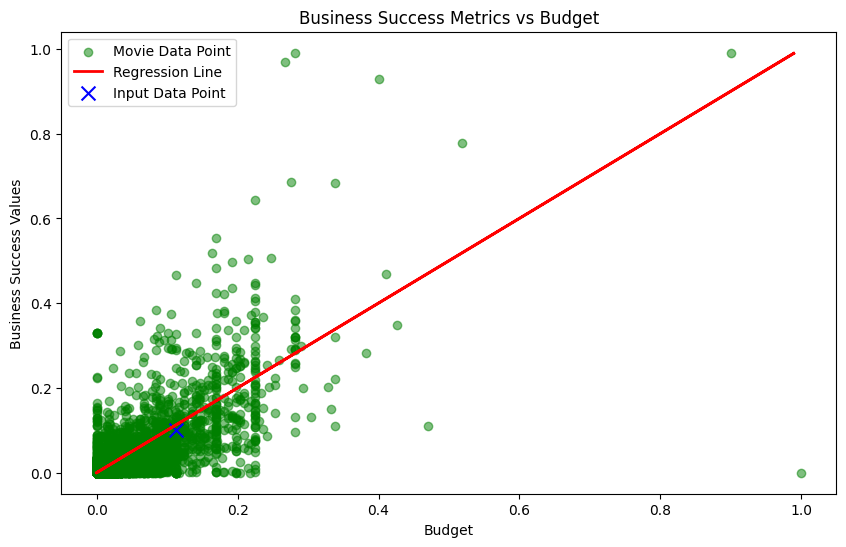

In [34]:
# Scatter plot of PCA values against budget
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['pca'], color='green', alpha=0.5, label='Movie Data Point')

# Plotting the regression line
plt.plot(y_test, y_test, color='red', linewidth=2, label='Regression Line')

# Adding the input data point
plt.scatter(input_df['budget'], predicted_pca, color='blue', marker='x', s=100, label='Input Data Point')

# Adding labels and title
plt.xlabel('Budget')
plt.ylabel('Business Success Values')
plt.title('Business Success Metrics vs Budget')
plt.legend()

# Show the plot
plt.show()

In [35]:
# Extract the coefficients and intercept from the linear regression model
coefficients = linear_regressor.coef_[0]
intercept = linear_regressor.intercept_[0]

# Define the expected revenue and popularity
# Scale the desired revenue and popularity
scaled_desired_revenue, scaled_desired_popularity = pca_scaler_2.transform([[desired_revenue, desired_imdb_popularity]])[0]

In [36]:
# Combine the scaled desired revenue and popularity into a single array
scaled_desired_features = np.array([[scaled_desired_revenue, scaled_desired_popularity]])

# Transform the scaled features using the PCA object
desired_pca = pca.transform(scaled_desired_features)

print(f"Desired PCA: {desired_pca}")

Desired PCA: [[0.1195196]]


In [37]:
# Create a function to calculate the ideal budget
def calculate_ideal_budget(desired_pca, coefficients, intercept):
    # Extract the coefficients for revenue and popularity
    coef_pca = coefficients[0]
    
    # Calculate the ideal budget using the inverse regression formula
    ideal_budget = (desired_pca - intercept) / coef_pca
    
    # Descale the ideal budget using the budget_scaler
    ideal_budget = budget_scaler.inverse_transform(ideal_budget.reshape(-1, 1))[0][0]
    return ideal_budget

In [38]:
# Calculate the ideal budget
ideal_budget = calculate_ideal_budget(desired_pca, coefficients, intercept)

In [39]:
from sklearn.neighbors import NearestNeighbors

# Find the closest genres to the data
def find_nearest_genres(instance, X, n_neighbors=3):
    # Initialize the NearestNeighbors model
    nn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
    
    # Fit the model on the dataset
    nn.fit(X)
    
    # Find the nearest neighbors
    distances, indices = nn.kneighbors([instance])
    
    # Get the genres of the nearest neighbors
    nearest_genres = X.iloc[indices[0]].sum().sort_values(ascending=False).index.tolist()
    
    return nearest_genres

# Create a dummy instance with the ideal budget and desired genres
dummy_instance = {
    'budget': ideal_budget,
}
for genre in desired_genres:
    dummy_instance[genre] = 1

# Convert the dummy instance to a DataFrame
dummy_instance_df = pd.DataFrame([dummy_instance])

# Fill missing attributes with 0
for col in X.columns:
    if col not in dummy_instance_df.columns:
        dummy_instance_df[col] = 0

# Find the nearest genres
nearest_genres = find_nearest_genres(dummy_instance_df.iloc[0], X)
print(f"Nearest Genres: {nearest_genres[1:4]}")
print(f"Ideal Budget: {ideal_budget}")


Nearest Genres: ['Horror', 'Adventure', 'War']
Ideal Budget: 120500570.19934368
